In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
len(train) , len(test)

(8523, 5681)

In [6]:
# data concat
df = pd.concat((train,test), axis=0)
df.reset_index(drop=True, inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


## Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


There are null value in  Item_Weigh and  Outlet_Size 


In [9]:
df['Item_Weight'].mean()

12.792854228644991

In [10]:
df['Item_Weight'].fillna(df['Item_Weight'].mean() , inplace = True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

#### Item weight null value is replace by mean of Item weight

In [12]:
df[['Outlet_Size','Outlet_Type','Outlet_Location_Type']]

,Outlet_Size,Outlet_Type,Outlet_Location_Type
0,Medium,Supermarket Type1,Tier 1
1,Medium,Supermarket Type2,Tier 3
2,Medium,Supermarket Type1,Tier 1
3,NaN,Grocery Store,Tier 3
4,High,Supermarket Type1,Tier 3
...,...,...,...
14199,Small,Supermarket Type1,Tier 1
14200,Medium,Supermarket Type2,Tier 3
14201,NaN,Supermarket Type1,Tier 2
14202,NaN,Supermarket Type1,Tier 2


In [13]:
mode_of_Outlet_size=df.pivot_table(values=['Outlet_Size','Outlet_Location_Type'], columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [14]:
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3
Outlet_Size,Small,Small,Medium,Medium


Here outlet location type does to have much corelation with  outlet size

If the outlet type is Grocery Store in most of the cases the outlet size(mode)   is Small

If the outlet type is Supermarket Type1 in most of the cases the outlet         size(mode) is Small

If the outlet type is Supermarket Type2 in most of the cases the outlet     size(mode) is Medium

If the outlet type is Supermarket Type3 in most of the cases the outlet   size(mode) is Medium

Now relpeacing null value of outlet size with the given relation

In [15]:
outlet_missing=df['Outlet_Size'].isnull()

In [16]:
df.loc[outlet_missing, 'Outlet_Size'] = df.loc[outlet_missing,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [17]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

### EDA

<AxesSubplot:>

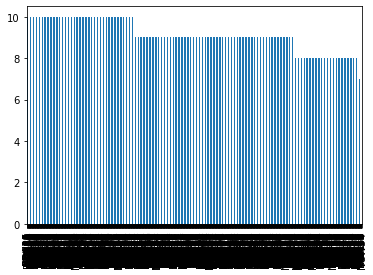

In [18]:
df['Item_Identifier'].value_counts().plot(kind ='bar')

In [19]:
len(df['Item_Identifier'].unique())

1559

In [20]:
df.drop('Item_Identifier',axis=1,inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Here low fat , LOW Fat ,LF are same and Regular, reg are same

we can merge them to low fat and Regular

In [22]:
df['Item_Fat_Content'][df['Item_Fat_Content']=='Low Fat']='low fat'
df['Item_Fat_Content'][df['Item_Fat_Content']=='LF']='low fat'
df['Item_Fat_Content'][df['Item_Fat_Content']=='reg']='Regular'


C:\Users\HP\AppData\Local\Temp/ipykernel_7524/2354300001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Fat_Content'][df['Item_Fat_Content']=='Low Fat']='low fat'
C:\Users\HP\AppData\Local\Temp/ipykernel_7524/2354300001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Fat_Content'][df['Item_Fat_Content']=='LF']='low fat'
C:\Users\HP\AppData\Local\Temp/ipykernel_7524/2354300001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [23]:
df['Item_Fat_Content'].unique()

array(['low fat', 'Regular'], dtype=object)

#### One hot encoding 
here there are 2 catagorical fature therefor we can apply onehotencoding

In [24]:
df['low_fat']=pd.get_dummies(df['Item_Fat_Content'], drop_first=True)
df.drop('Item_Fat_Content', axis=1,inplace=True)

In [25]:
df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,low_fat
0,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1
1,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0
2,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1
3,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,0
4,8.93,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1


In [26]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,low_fat
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914,0.646649
std,4.234226,0.051459,62.086938,8.371664,1706.499616,0.478027
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400,0.000000
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000,1.000000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400,1.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,1.000000


In [27]:
set(df['Item_Type'].unique())

{'Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks',
 'Starchy Foods'}

<AxesSubplot:>

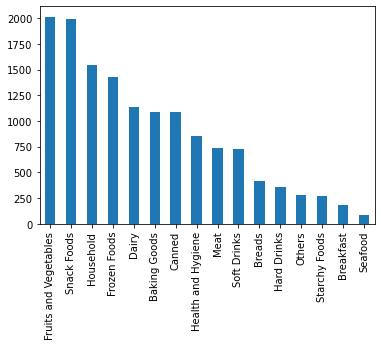

In [28]:

df['Item_Type'].value_counts().plot(kind='bar')

<AxesSubplot:>

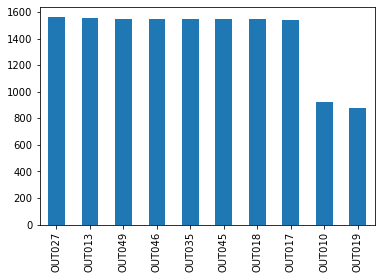

In [29]:

df['Outlet_Identifier'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Outlet_Identifier'>

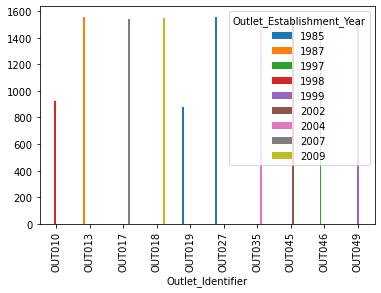

In [30]:
CrosstabResult=pd.crosstab(index=df['Outlet_Identifier'],columns=df['Outlet_Establishment_Year'])
CrosstabResult.plot.bar()

Here correlation between outlet Indentifier and Outlet_Establishment_Year are 1

so we can drop Outlet_Establishment_Year

In [31]:
df.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [32]:
df['Outlet_Size'].unique() , df['Outlet_Location_Type'].unique() ,df['Outlet_Type'].unique()

(array(['Medium', 'Small', 'High'], dtype=object),
 array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object),
 array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
        'Supermarket Type3'], dtype=object))

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()

There are many feature where we will use Label encoding

In [35]:
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [36]:
df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,low_fat
0,9.30,0.016047,4,249.8092,9,1,0,1,3735.1380,1
1,5.92,0.019278,14,48.2692,3,1,2,2,443.4228,0
2,17.50,0.016760,10,141.6180,9,1,0,1,2097.2700,1
3,19.20,0.000000,6,182.0950,0,2,2,0,732.3800,0
4,8.93,0.000000,9,53.8614,1,0,2,1,994.7052,1


In [37]:
df.describe()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,low_fat
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.792854,0.065953,7.229372,141.004977,4.722473,1.453605,1.112856,1.201281,2181.288914,0.646649
std,4.234226,0.051459,4.213471,62.086938,2.837101,0.683045,0.812755,0.796543,1706.499616,0.478027
min,4.555000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,33.290000,0.000000
25%,9.300000,0.027036,4.000000,94.012000,2.000000,1.000000,0.000000,1.000000,834.247400,0.000000
50%,12.792854,0.054021,6.000000,142.247000,5.000000,2.000000,1.000000,1.000000,1794.331000,1.000000
75%,16.000000,0.094037,10.000000,185.855600,7.000000,2.000000,2.000000,1.000000,3101.296400,1.000000
max,21.350000,0.328391,15.000000,266.888400,9.000000,2.000000,2.000000,3.000000,13086.964800,1.000000


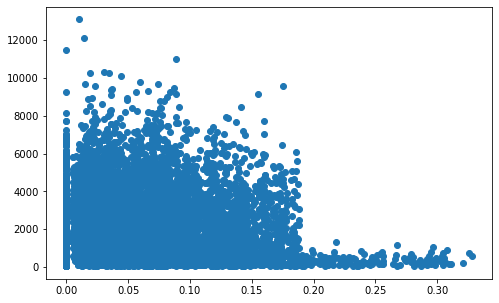

In [38]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=df)

Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

In [39]:
df['Item_Visibility']=df['Item_Visibility'].replace(0,df['Item_Visibility'].mean())

Text(0, 0.5, 'Item Visibility')

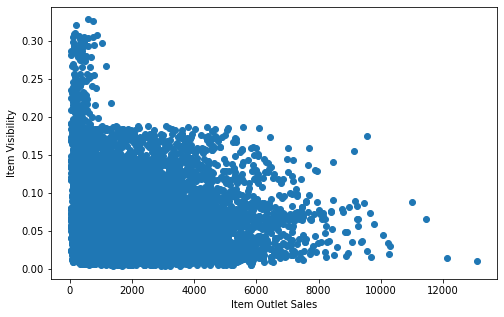

In [40]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=df)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

### split train and test dataset

In [41]:
df_train = df.iloc[:8523,:]
df_test = df.iloc[8523:,:]

In [42]:
df_train.tail()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,low_fat
8518,6.865,0.056783,13,214.5218,1,0,2,1,2778.3834,1
8519,8.380,0.046982,0,108.1570,7,2,1,1,549.2850,0
8520,10.600,0.035186,8,85.1224,6,2,1,1,1193.1136,1
8521,7.210,0.145221,13,103.1332,3,1,2,2,1845.5976,0
8522,14.800,0.044878,14,75.4670,8,2,0,1,765.6700,1


In [43]:
df_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,low_fat
8523,20.750000,0.007565,13,107.8622,9,1,0,1,NaN,1
8524,8.300000,0.038428,4,87.3198,2,2,1,1,NaN,0
8525,14.600000,0.099575,11,241.7538,0,2,2,0,NaN,1
8526,7.315000,0.015388,13,155.0340,2,2,1,1,NaN,1
8527,12.792854,0.118599,4,234.2300,5,1,2,3,NaN,0


In [44]:
df_test.drop('Item_Outlet_Sales',axis=1,inplace=True)
df_test.head()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,low_fat
8523,20.750000,0.007565,13,107.8622,9,1,0,1,1
8524,8.300000,0.038428,4,87.3198,2,2,1,1,0
8525,14.600000,0.099575,11,241.7538,0,2,2,0,1
8526,7.315000,0.015388,13,155.0340,2,2,1,1,1
8527,12.792854,0.118599,4,234.2300,5,1,2,3,0


### scaling the data

In [45]:
X = df_train.drop('Item_Outlet_Sales',axis=1)

In [46]:
X.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,low_fat
0,9.30,0.016047,4,249.8092,9,1,0,1,1
1,5.92,0.019278,14,48.2692,3,1,2,2,0
2,17.50,0.016760,10,141.6180,9,1,0,1,1
3,19.20,0.065953,6,182.0950,0,2,2,0,0
4,8.93,0.065953,9,53.8614,1,0,2,1,1


In [47]:
y = df_train['Item_Outlet_Sales']


In [48]:
std = StandardScaler()

In [49]:
X_scal=std.fit_transform(X)
test_scal = std.fit_transform(df_test)

### Train test split for model creation

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X_scal,y ,test_size=0.25,random_state=42)







## model buliding

### Linear model

In [51]:
from sklearn.linear_model import LinearRegression


In [52]:
linear_model = LinearRegression()

In [53]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [54]:
linear_model.score(X_test,y_test)

0.5053986803484343

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

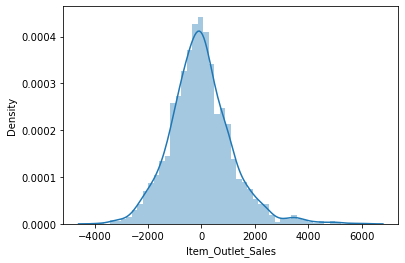

In [55]:
# Visualising the results
prediction = linear_model.predict(X_test)
sns.distplot(y_test-prediction)

In [56]:
from xgboost import XGBRegressor
from sklearn import metrics

In [57]:
regressor = XGBRegressor()

In [58]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [59]:
regressor.score(X_test,y_test)

0.5292685199110874

In [60]:
sales_data_prediction = regressor.predict(X_train)
r2_sales = metrics.r2_score(y_train, sales_data_prediction)
print('R Squared value = ', r2_sales)

R Squared value =  0.8630878459040856


In [61]:
data_prediction = regressor.predict(X_test)
r2_data = metrics.r2_score(y_test, data_prediction)
print('R Squared value = ', r2_data)

R Squared value =  0.5292685199110874


### Random forest

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22)

In [64]:
RF.score(X_test,y_test)

0.6051104718646816

Out of all applied algorithm Random forest work fer better 

In [68]:
import pickle

In [69]:
file = open('RF.pkl', 'wb')
pickle.dump(RF, file)